###**1. PROJECT AIM**


- Perform EDA and any data cleaning if necessary.
- Perform one hot encoding for categorical variables
- Visualize the histograms of numerical features. Do you observe skewness in the data? If yes
apply the log transformation. Check the histograms again to see if data has been normalized.
- Apply Feature Scaling
- Choose only the numerical features for clustering
- Apply elbow method to find best number of clusters. Plot the graph.
- Choose optimum number of clusters and visualize it using PCA
- Implement KFOLD CV and use any classifier of your choosing and report the evaluation metrics
- Conclusion

###**2.Librarys:**
* Importing Librarys
* Importing Dataset

In [ ]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!pip install plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
from collections import Counter
from subprocess import call
from IPython.display import Image

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation

import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing the data
df = pd.read_csv("/content/German Dataset.csv")

In [ ]:
#checking the first five rows
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
#checking the shape
df.shape

(1000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
#checking the data description
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


#**Descriptive analysis**

In [ ]:
numerical = ['Credit amount','Age','Duration']
categorical = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']


In [ ]:
n_unique = df.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [ ]:
print("Unique values in each categorical column:")
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk : ['good' 'bad']


In [ ]:
df['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

##**Exploratory Data Analysis**



**UNIVARIATE ANALYSIS**

**Pairplot of all the numerical features: TO VISUALIZE FEATURES WITH LINEAR RELATIONSHIP**

Insight from the Graph:
* Most of the credit cards have an amount of 1500 - 4000
* The Credit amount is positively skewed, So the samples are dispersed

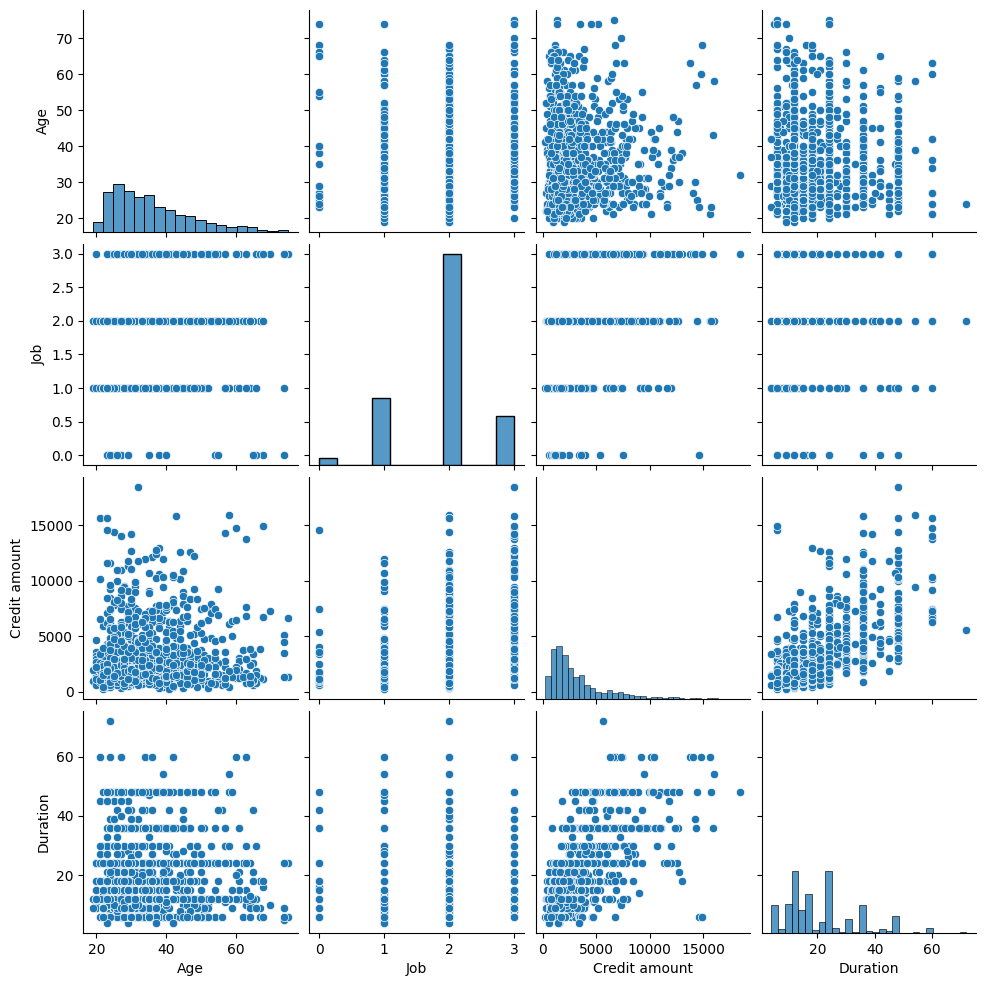

In [ ]:
sns.pairplot(df)

**Bar plot of all the categorical feature. From the bar plot below, we can get some insight**

Observation:

1. The amount of men are greater than women
2. Most of the customer are skilled on their job
3. Most of the customer have their own house
4. Most of the customer have little saving account
5. Most of the customer hav little checking account
6. Most of the customer use credit for car

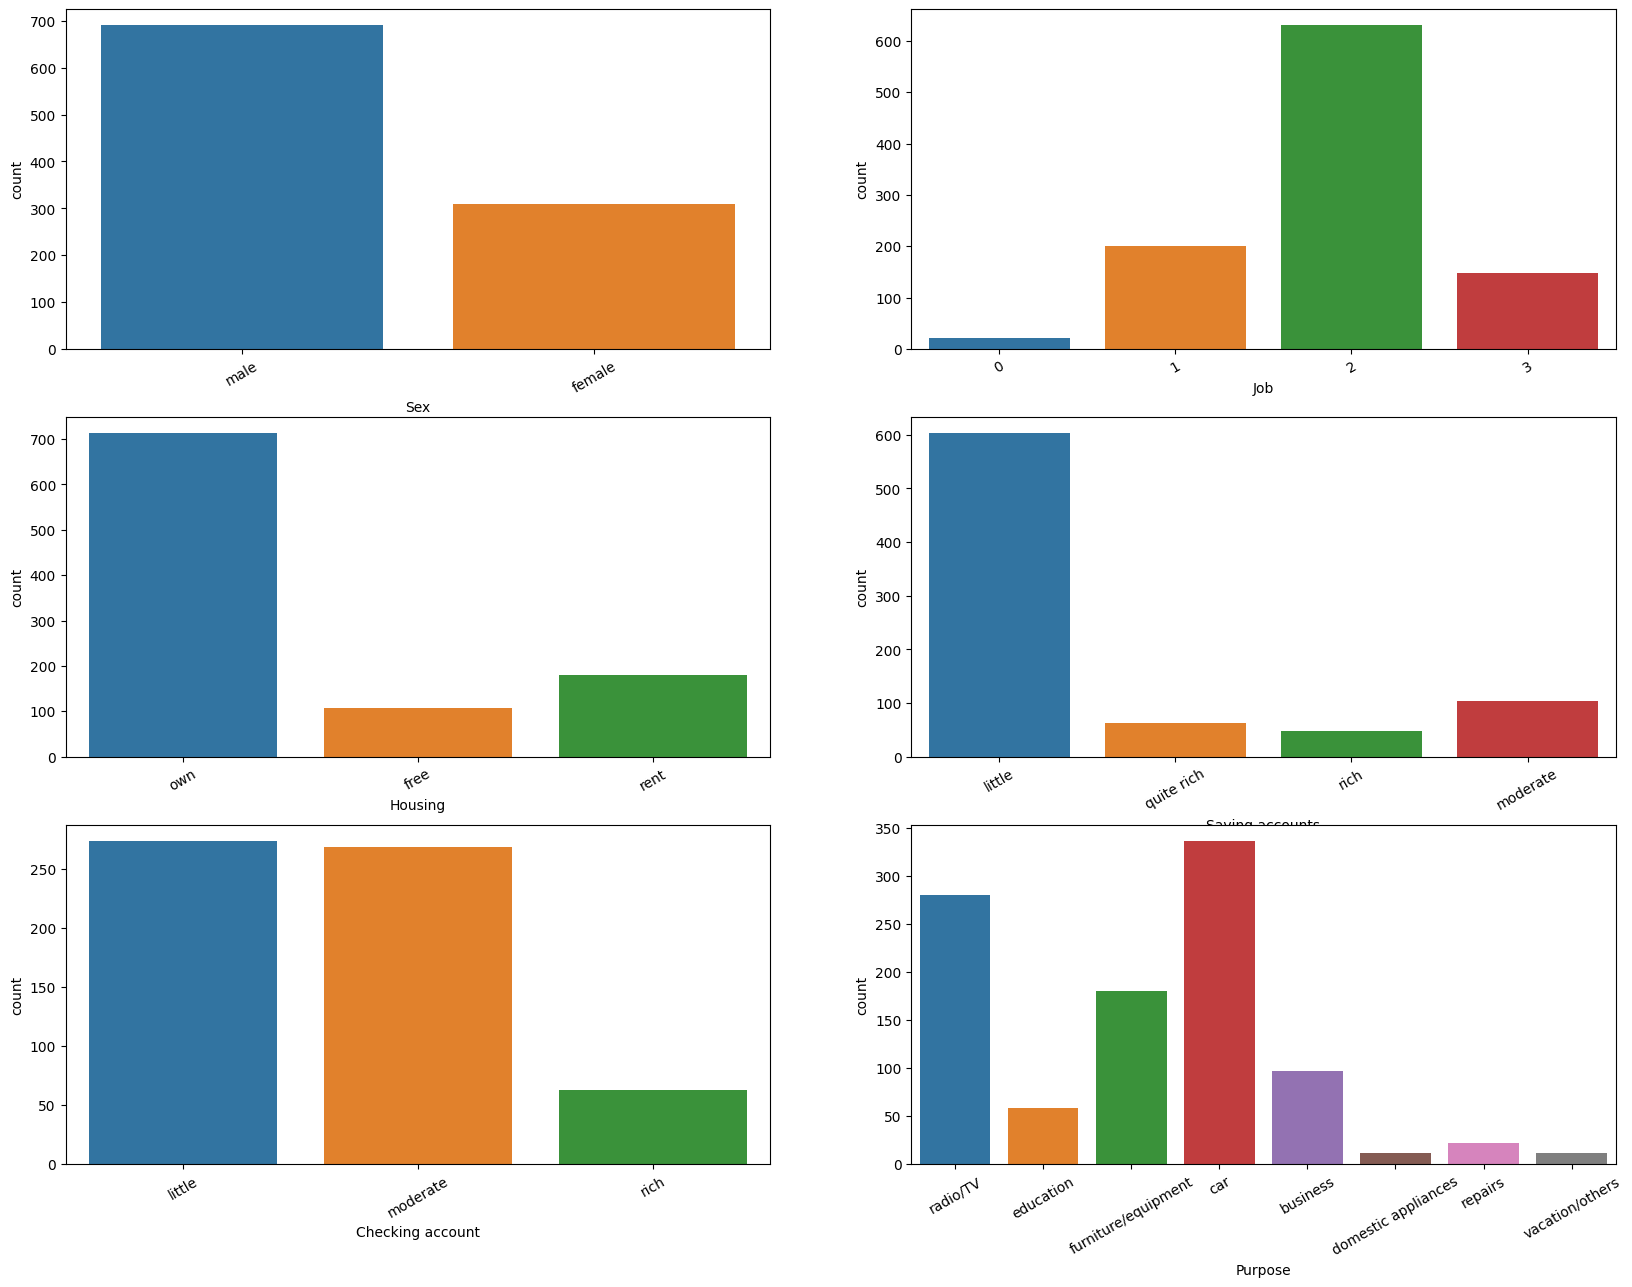

In [ ]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df, x = cat)
    plt.xticks(rotation=30)
plt.show()

**BI-VARIATE ANALYSIS**

**Sex vs Age**

In [ ]:
SA = df.loc[:,['Sex','Age']]
fig = px.box(SA, x="Sex", y="Age", points="all",color="Sex")
fig.update_layout(
    title={
          'text':"Sex Vs Age Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Sex",
    yaxis_title="Age",

)
fig.show()
#import plotly.io as pio
#pio.write_html(fig, file='SA.html', auto_open=True)

**Graph insight:**

The graph above indicates the sex of a person agasint their age in the dataset

The maximum age of a male and female is  75

The average age of a male is 35 and a female is 29

The minimum age of a male is 20 and a female is 19

In [ ]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

Here we would look at scatter plots our 3 numerical variables stratified by sex.

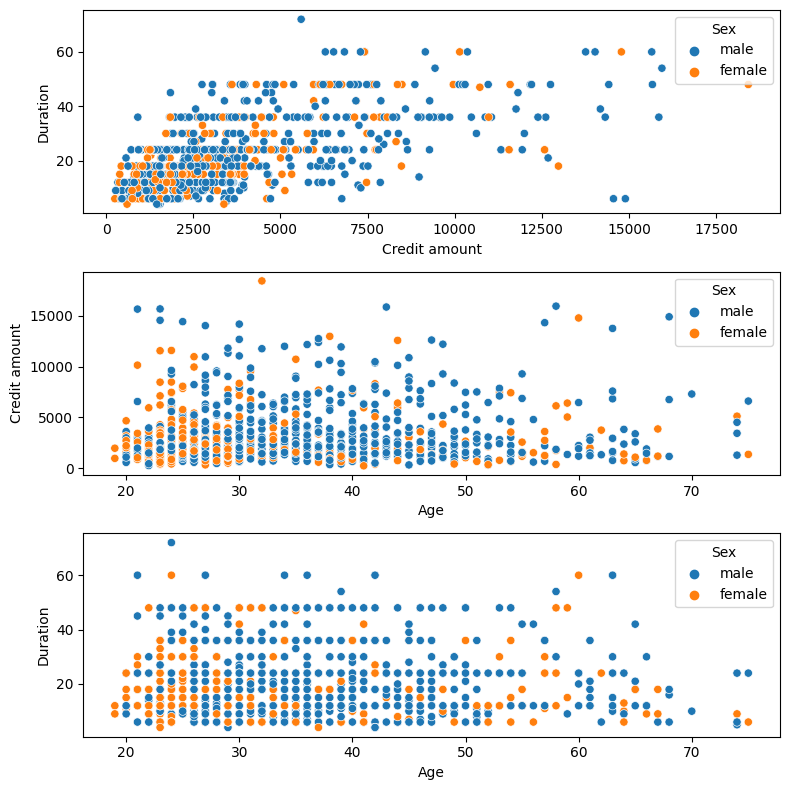

In [ ]:
scatters(df, h="Sex")

**Plot Insight:**

The general impression is that women tend to be younger than men, however, the plot at the top shows that there is no clear difference between men and women in terms of amount and duration of the credit. From visual inspection, it seems that there is some positive correlation between duration and amount of credit, which makes sense.

1. Checking the linear correlation between credit amount and duration

<Axes: >

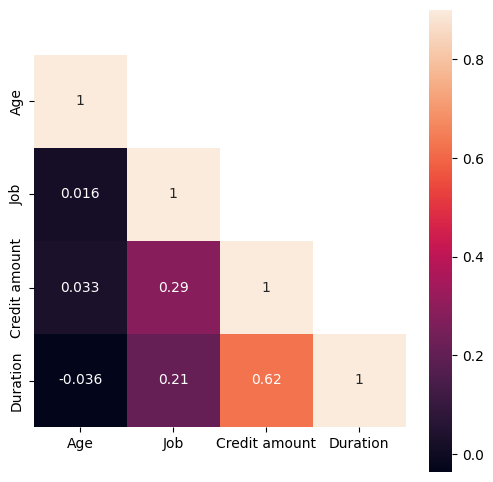

In [ ]:
#create correlation
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (3,4))
fig.set_size_inches(6,6)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

**Correlation Data Insight:**

From the heatmap above we can see that the best correlation is between credit amount and duration. But so far we will still use all the numeric features for the clustering.

**Bar graph: Number of granted credits:**

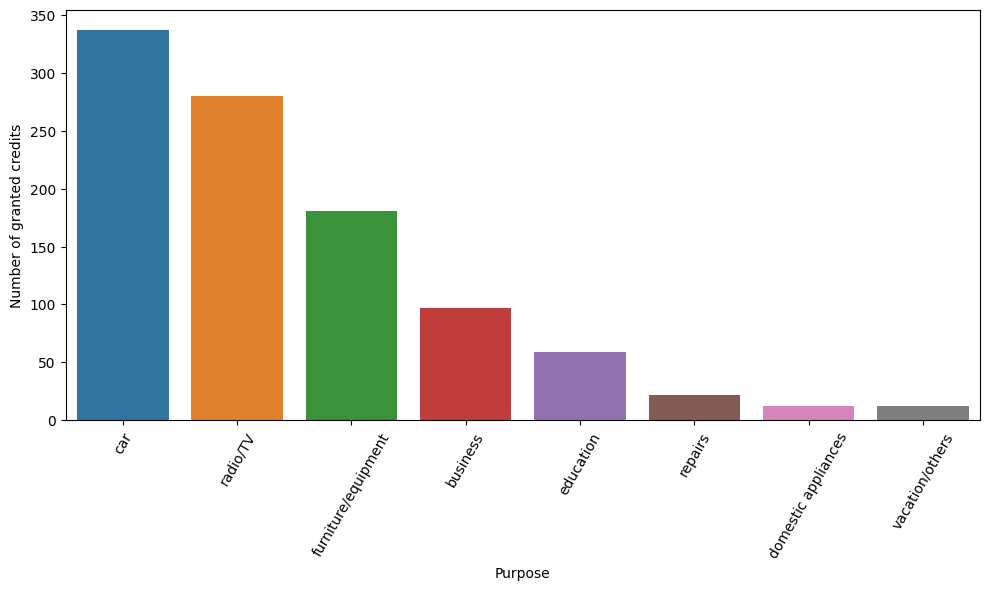

In [ ]:
n_credits = df.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

**Graph Insight:**
The barplot above shows how many credits were granted for various purposes. Most of credits were granted for car and radio/TV.

Now I will generate boxplots for detailed analysis of categorical variables.

In [ ]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

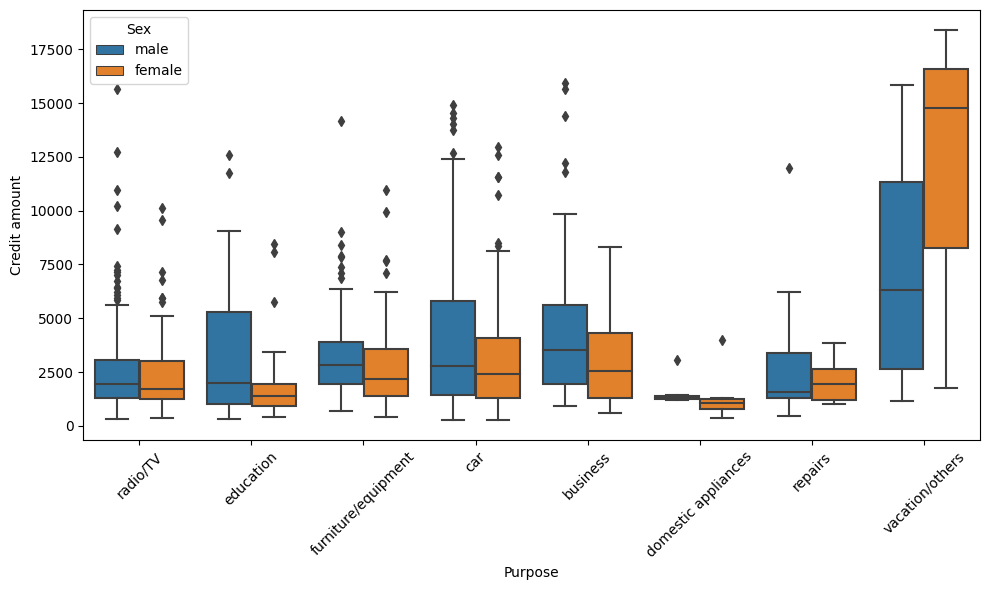

In [ ]:
boxes("Purpose","Credit amount","Sex")

The plot above shows that the biggest amounts are taken for vacations/others, the smallest for domestic appliances. Most of them have outliers on the upper side of the boxes (higher amounts). In most of the cases there is no difference between men and women, despite category vacation/others. But one must remember that there was very little number of credits granted in this category.

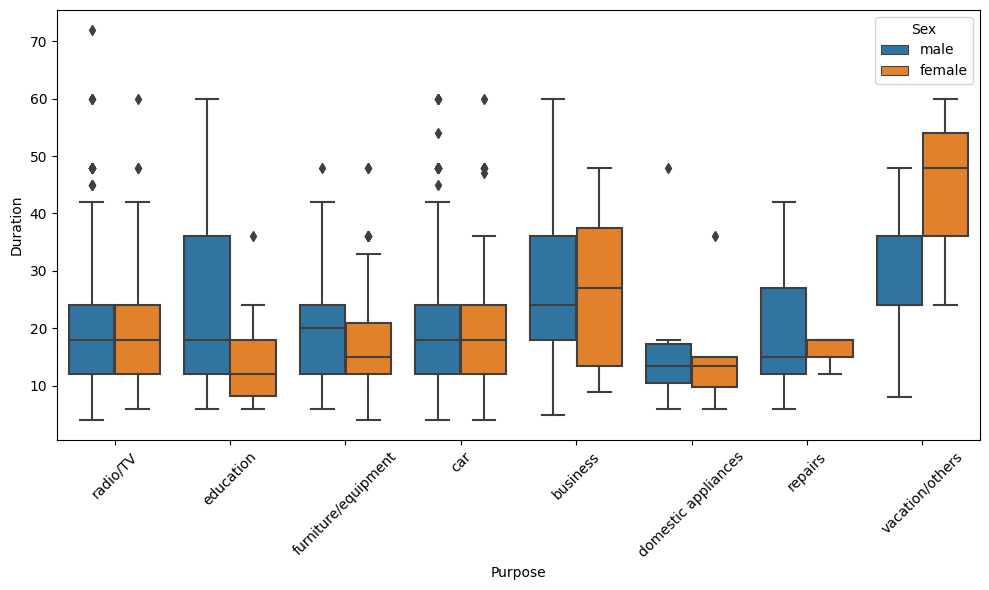

In [ ]:
boxes("Purpose","Duration","Sex")

The boxplot above indicates that generally there is no difference in credit duration between men and women. We can’t see also clear trend between categories with observations that the shortest duration is for domestic appliances. It makes sense as it is in agreement with insights from the previous graph (credit amount) – in this category, there are the lowest amounts of credits.

**Housing Category:**
In terms of housing category, there is no big difference despite people having “free” housing tend to take slightly bigger credit amounts.

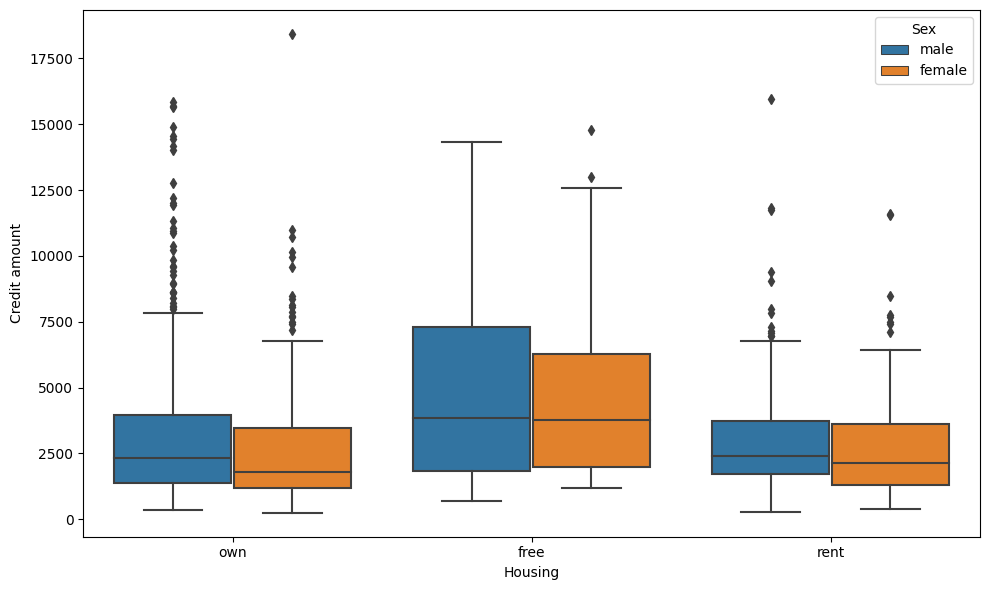

In [ ]:
boxes("Housing","Credit amount","Sex",r=0)

**Job Category:**
In terms of job category once again there is no difference between men and women, but we can see that job category 3 tends to take bigger credit amounts for longer duration.

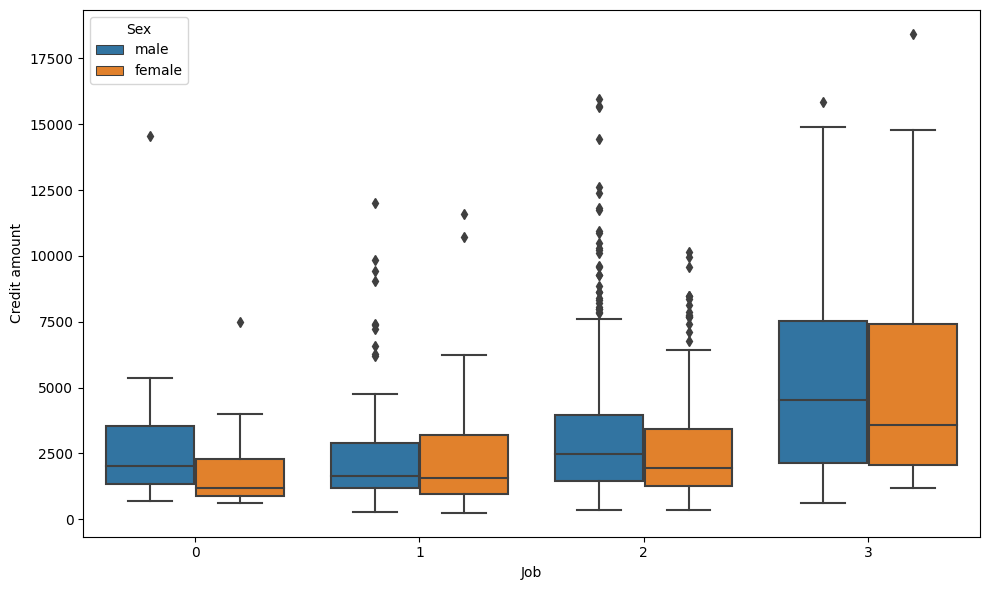

In [ ]:
boxes("Job","Credit amount","Sex",r=0)

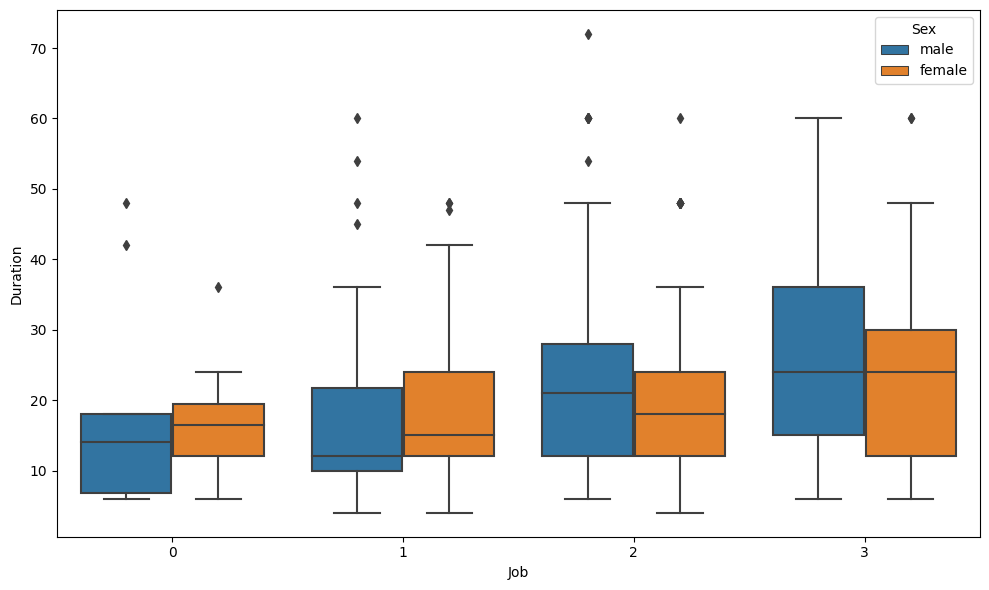

In [ ]:
boxes("Job","Duration","Sex",r=0)

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


##**Data Preprocessing**

#**Handling Missing Values**

###**3. Missing values identification**
As shown above, the number of rows (samples) is 1000 and number of columns (variables) is 10. There are some missing values (indicated by NaN). Now, we want to check how many missing values exist in each variable.

In [ ]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])

In [ ]:
#Rechecking if any missing value
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

###**2. Perform one hot encoding for categorical variables**
One-Hot Encoding: is the concept of creating a new column for each unique category in a categorical variable. Meaning It  creates new (binary) columns, indicating the presence of each possible value from the original data. Each observation receives a value of “1” in the column for its corresponding category and a value “0” in all other new columns.

Object indicates a column has text (there are other things it could be theoretically be, but that's unimportant for our purposes). It's most common to one-hot encode these "object" columns, since they can't be plugged directly into most models. Pandas offers a convenient function called get_dummies to get one-hot encodings. Call it like this:


In [ ]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [ ]:
df['Saving accounts'] = df['Saving accounts'].fillna('no_inf')
df['Checking account'] = df['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df_credit = df.merge(pd.get_dummies(df.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)


In [ ]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Sex_male,Housing_own,Housing_rent,Savings_moderate,Savings_quite rich,Savings_rich,Risk_bad,Risk_good,Check_moderate,Check_rich
0,67,male,2,own,little,little,1169,6,radio/TV,good,...,1,1,0,0,0,0,0,1,0,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,...,0,1,0,0,0,0,1,0,1,0
2,49,male,1,own,little,little,2096,12,education,good,...,1,1,0,0,0,0,0,1,0,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,...,1,0,0,0,0,0,0,1,0,0
4,53,male,2,free,little,little,4870,24,car,bad,...,1,0,0,0,0,0,1,0,0,0


###Deleting Old features

In [ ]:
#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit['Risk_good']

In [ ]:
df_credit.head()

,Age,Job,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,...,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent,Savings_moderate,Savings_quite rich,Savings_rich,Risk_bad,Check_moderate,Check_rich
0,67,2,1169,6,good,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
1,22,2,5951,48,bad,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,49,1,2096,12,good,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
3,45,2,7882,42,good,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,53,2,4870,24,bad,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


##**3. Visualize the histograms of numerical features**

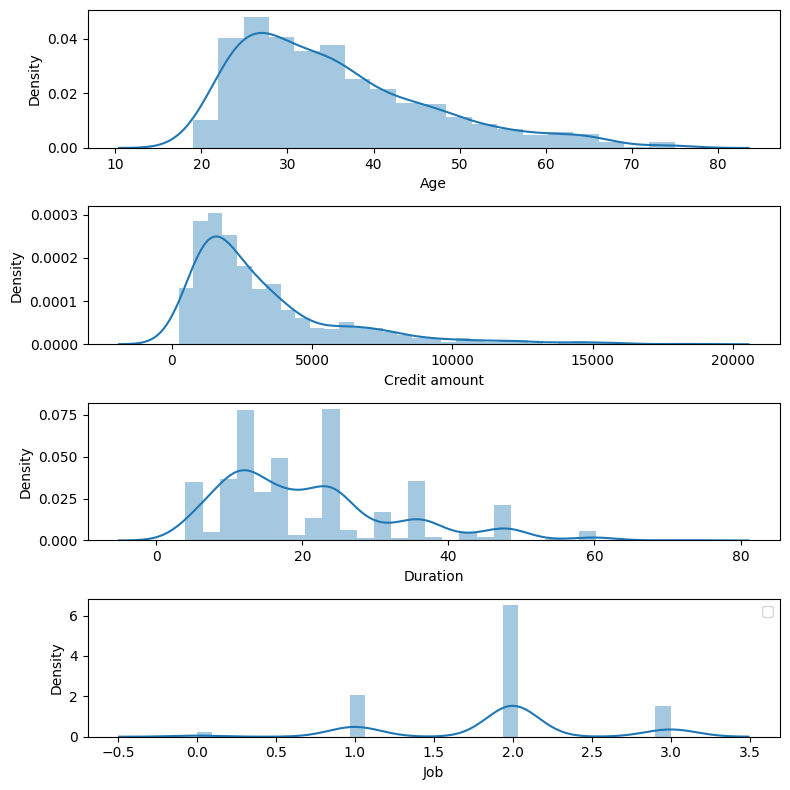

In [ ]:
#Creating a function which plots three histograms - one for each numberical variable.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,8))
sns.distplot(df["Age"], ax=ax1)
sns.distplot(df["Credit amount"], ax=ax2)
sns.distplot(df["Duration"], ax=ax3)
sns.distplot(df["Job"], ax=ax4)
plt.tight_layout()
plt.legend()

**Graph Insight:**

From the graph above it is observed that the distributions are right-skewed. To obtain better results we should remove the skewness by logarithmic transformation. After applying log transformation in the chart that let's see how they look like.

###**4. Apply log transformation, if applicable, based on the distribution of data: 1pt**

We can use logarithmic transformation to reduce the outliers and distribution skewness.

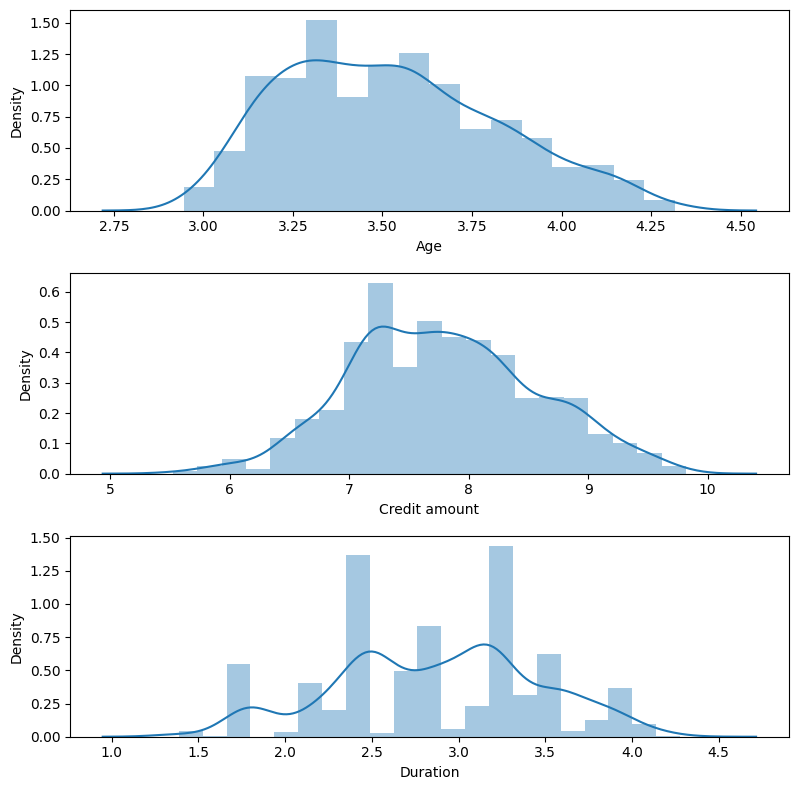

In [ ]:
df_cluster_log = np.log(df[['Age', 'Credit amount','Duration']])

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(df_cluster_log["Age"], ax=ax1)
sns.distplot(df_cluster_log["Credit amount"], ax=ax2)
sns.distplot(df_cluster_log["Duration"], ax=ax3)
plt.tight_layout()

We can see that the skewness of the distribution is eliminatied.

The next step will be centering and scaling of variables – it is required by KMeans algorithm. StandardScaler from sklearn library will be applied to achieve this.

##**4. Apply Feature Scaling: 1pt**

In [ ]:
df_cluster_log.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster_log)

In [ ]:
#show new values
print(cluster_scaled)
cluster_scaled

[[ 2.27100592 -0.933901   -1.86486906]
 [-1.44615223  1.16304581  1.7083687 ]
 [ 1.22669602 -0.1815588  -0.67378981]
 ...
 [ 0.37810951 -1.4161991  -0.67378981]
 [-1.29778048 -0.34591111  1.59746802]
 [-0.76258638  0.82450846  1.59746802]]


array([[ 2.27100592, -0.933901  , -1.86486906],
       [-1.44615223,  1.16304581,  1.7083687 ],
       [ 1.22669602, -0.1815588 , -0.67378981],
       ...,
       [ 0.37810951, -1.4161991 , -0.67378981],
       [-1.29778048, -0.34591111,  1.59746802],
       [-0.76258638,  0.82450846,  1.59746802]])

##**5. Use elbow plot to find the optimum number of clusters: 2pts**

Creating a clustering model based on the features we already choose. We will try three clustering models, those are:

First, we use Elbow Method to determine the optimal k value for the k-means.

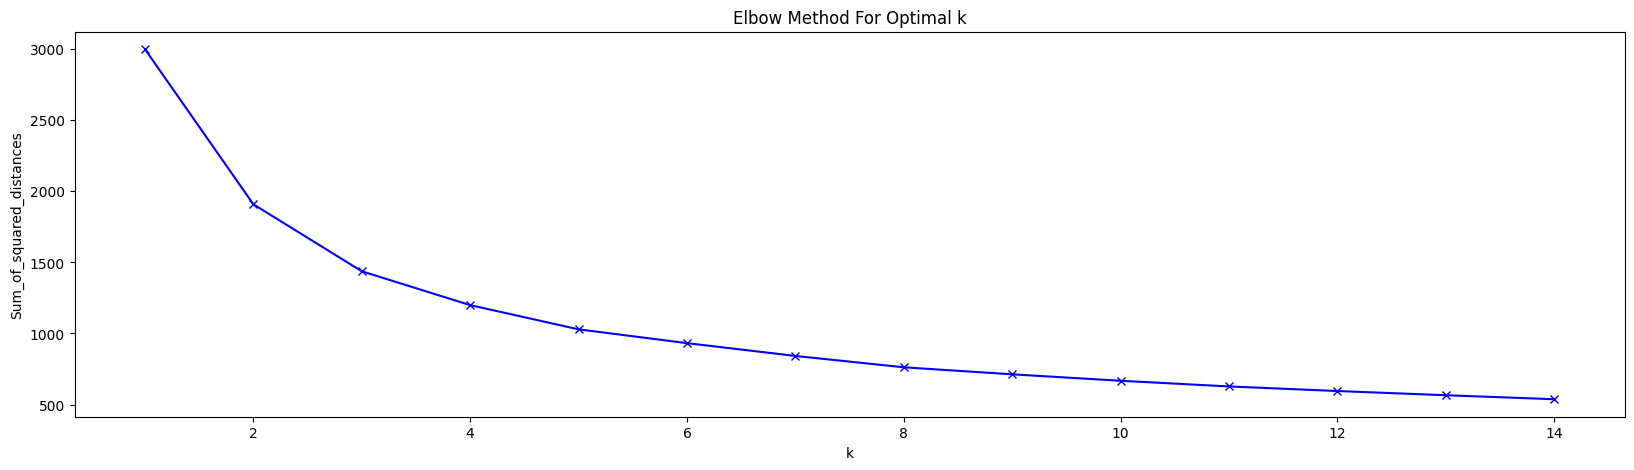

In [ ]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Elbow Graph Observation above:**

From the figure above we can see that the most optimal values are 3. So we choose 3 as the k values of the k-means model.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3)
clusters = model.fit_predict(cluster_scaled)
kmeans_labels = model.labels_




K-Means


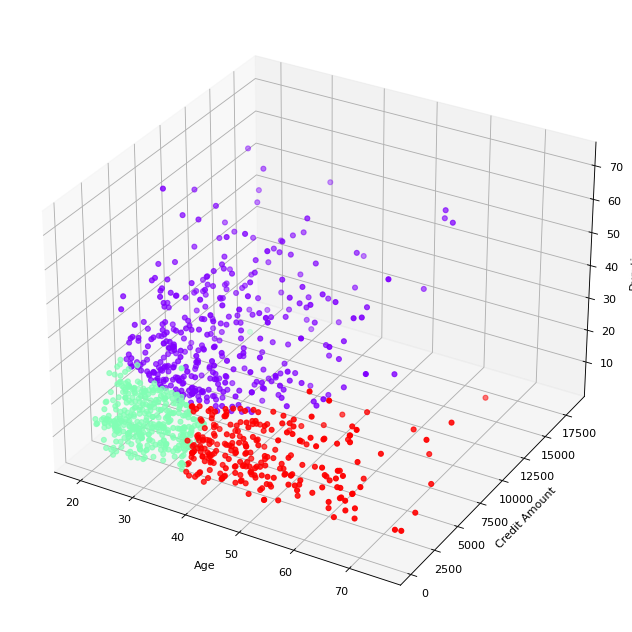

In [ ]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df['Age'],df['Credit amount'],df['Duration'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("K-Means")

**K-means scatter plot observation:**

Above, i have visualized the clusters using the scatter plot. As seen=, there are 3 clusters in total that are visualized in different colors, and the centroid of each cluster is visualized. From the figure above we could see that the cluster segmented well.

In [ ]:
#km = KMeans(n_clusters=3, random_state=0)
#clusters = km.fit_predict(cluster_scaled)

In [ ]:
#show a 3D plot of clusters
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure(figsize=(10,6))
#ax = fig.add_subplot(111, projection='3d')

#for i in range(3):
   # ax.scatter(cluster_scaled[clusters ==i,0], cluster_scaled[clusters ==i,1], cluster_scaled[clusters ==i,2])

In [ ]:
df_clustered = df[['Age', 'Duration', 'Credit amount']]
df_clustered['cluster'] = clusters

In [ ]:
df_clustered.groupby('cluster').mean()

,Age,Duration,Credit amount
cluster,,,
0,34.042667,32.224000,5665.384000
1,27.784153,14.245902,1732.199454
2,48.691120,13.918919,1979.745174


Cluster 0 – lower mean of credit amount, short duration, middle-aged customers

Cluster 1 – higher mean of credit amount, long duration, middle aged customers

Cluster 2 - lower mean of credit amount, short duration, young customers

##**5.1. Performing PCA with (2 components)**

In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(cluster_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principalDf.head()

,pc1,pc2
0,2.039569,2.263394
1,-2.068637,-1.418051
2,0.637681,1.234344
3,-2.098283,0.998277
4,-0.965198,1.532215


In [ ]:
# fit data
pca_data = pca.fit_transform(cluster_scaled)

In [ ]:
# Variance explained by principal components
print(pca.explained_variance_ratio_)

[0.5408953  0.33457078]


In [ ]:
# Total Variance explained by principal components
total_var = 100 * np.sum(pca.explained_variance_ratio_)
print(f'{total_var:.3}% of total variance is explained by 2 principal components')

87.5% of total variance is explained by 2 principal components


##**7. Visualize the clusters in the data using PCA: 2pts**

In [ ]:
# Interpret 2 cluster solution
mode2Cluster = KMeans(n_clusters=2)
mode2Cluster.fit(cluster_scaled)
preds=mode2Cluster.predict(cluster_scaled)

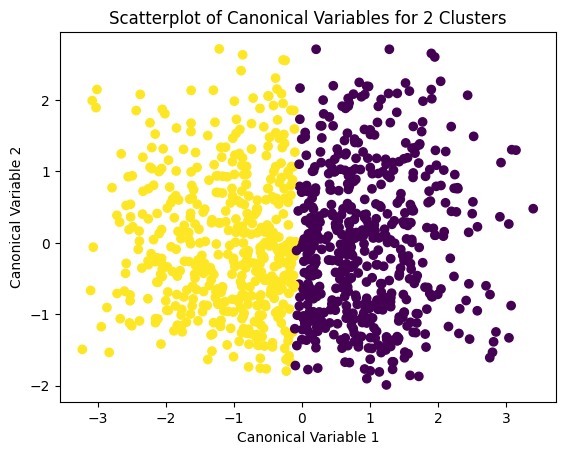

In [ ]:
# Squash the data into 2D
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(cluster_scaled)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=mode2Cluster.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show()

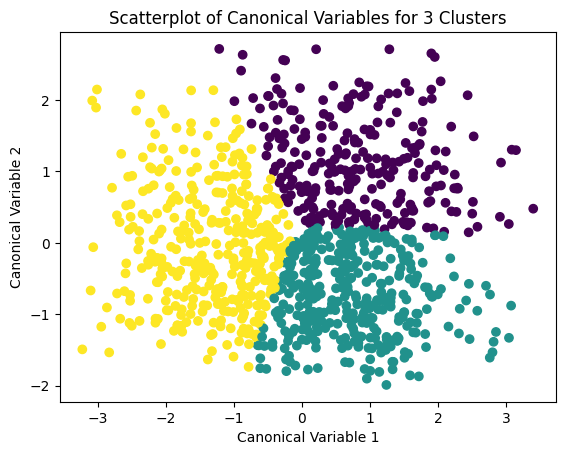

In [ ]:
# Interpret 3 cluster solution
mode3Cluster = KMeans(n_clusters=3)
mode3Cluster.fit(cluster_scaled)
preds=mode3Cluster.predict(cluster_scaled)

# Squash the data into 2D
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(cluster_scaled)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=mode3Cluster.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

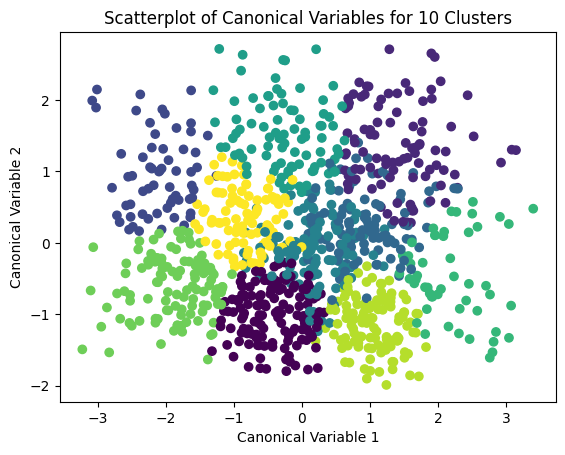

In [ ]:
# Interpret 10- cluster solution
mode10Cluster = KMeans(n_clusters=10)
mode10Cluster.fit(cluster_scaled)
preds=mode3Cluster.predict(cluster_scaled)

# Squash the data into 2D
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(cluster_scaled)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=mode10Cluster.labels_,)
plt.xlabel('Canonical Variable 1')
plt.ylabel('Canonical Variable 2')
plt.title('Scatterplot of Canonical Variables for 10 Clusters')
plt.show()


###**PCA Observation:**
Using the PCA class in the Scikit-learn machine learning (packaged library). In performing the feature scaling before running the PCA algorithm. Then, i provide standardized (scaled) data into the PCA algorithm and obtain results. To perform PCA, created an object (called pca) from the PCA() class by specifying relevant values for the hyperparameters. The most important hyperparameter is n_components. Using two components only, set n_components to 2. Then, called the pca object’s fit() method to perform PCA. Providing scaled data to the fit() method. Then calling various methods and attributes of the pca object to get all the information needed. The outputs are in the form of numpy arrays. Finally, we call the transform() method of the pca object to get the component scores. There are only two columns not present. This is because i decided to keep only two components which together explain about 91.4% variability in the original data. By performing PCA, i have reduced the original dataset into two columns while keeping 87.5% variability (only 12.5% variability loss).

##**8. Implement KFOLD CV using any classifier of your choosing and report the evaluation metrics(precision, recall, and accuracy): 2pts**

**Implement XGBoost Classifier with 5 Fold CV and report the performance metrics**

In [ ]:
categorical_features = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

In [ ]:
#labelencode the categorical features
for i, cat in enumerate(categorical_features):
    df[cat] = LabelEncoder().fit_transform(df[cat])

In [ ]:
num_df_scaled = pd.DataFrame(cluster_scaled, columns=['Age', 'Duration', 'Credit Amount'])
cat_df = df[categorical_features]

data = pd.concat([cat_df, num_df_scaled], axis=1)

In [ ]:
#show new df
data.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Risk,Age,Duration,Credit Amount
0,1,2,1,0,0,5,1,2.271006,-0.933901,-1.864869
1,0,2,1,0,1,5,0,-1.446152,1.163046,1.708369
2,1,1,1,0,0,3,1,1.226696,-0.181559,-0.673790
3,1,2,0,0,0,4,1,0.942455,1.525148,1.478913
4,1,2,0,0,0,1,0,1.488620,0.904743,0.517289


In [ ]:
X = data.drop('Risk', axis=1)
y = data['Risk']

In [ ]:
#Import Machine Learning Libraries

from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split


import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

import joblib
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [ ]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
print('xtrain shape: ', X_train.shape)
print('xtest shape: ', X_test.shape)
print('ytrain shape: ', y_train.shape)
print('ytest shape: ', y_test.shape)

xtrain shape:  (800, 9)
xtest shape:  (100, 9)
ytrain shape:  (800,)
ytest shape:  (100,)


In [ ]:
X.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Age,Duration,Credit Amount
0,1,2,1,0,0,5,2.271006,-0.933901,-1.864869
1,0,2,1,0,1,5,-1.446152,1.163046,1.708369
2,1,1,1,0,0,3,1.226696,-0.181559,-0.673790
3,1,2,0,0,0,4,0.942455,1.525148,1.478913
4,1,2,0,0,0,1,1.488620,0.904743,0.517289


In [ ]:
whole_train = X_train
whole_val = X_val
whole_test = X_test

whole_train_labels = y_train
whole_val_labels = y_val
whole_test_labels = y_test

In [ ]:
tr_features = whole_train
tr_labels = whole_train_labels

val_features = whole_val
val_labels = whole_val_labels

te_features = whole_test
te_labels = whole_test_labels

In [ ]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(y), 2))

0.8
0.1
0.1


In [ ]:
print(len(X),len(y_train),len(y_val),len(y_test))

1000 800 100 100


In [ ]:
# Read in all features

whole_train = X_train
whole_val = X_val
whole_test = X_test


whole_train.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Age,Duration,Credit Amount
29,1,2,1,0,0,0,2.065537,1.341690,2.091811
535,1,2,2,0,2,3,-0.092785,-0.051283,0.287834
695,1,2,2,2,0,1,1.294129,-0.862090,-1.864869
557,0,2,1,0,0,1,-0.524070,0.939460,0.287834
836,0,2,1,0,0,5,-1.601427,-1.291061,-0.673790


#**XGBOOST**

###**Fit and evaluate a basic model using 5-fold Cross-Validation**

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

#### Hyperparameter Tuning of XGBoost

In [ ]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}

0.699 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.699 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.693 (+/-0.015) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.7 (+/-0.021) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.699 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.698 (+/-0.01) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.691 (+/-0.04) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.698 (+/-0.042) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.699 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.702 (+/-0.017) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.702 (+/-0.029) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.685 (+/-0.056) for {'learning_rate'

#### Grid Search to find optimal hyperparameters

In [ ]:
XGBoost = XGBClassifier()

scores = cross_val_score(gb, X, y.values.ravel(), cv=5)

In [ ]:
scores

array([0.715, 0.72 , 0.67 , 0.685, 0.665])

In [ ]:
joblib.dump(cv.best_estimator_, '../../../GB_model.pkl')

['../../../GB_model.pkl']

In [ ]:
models = {}

for md in ['cv']:
  models[md] = joblib.load('../../../GB_model.pkl'.format(md))

In [ ]:
from time import time
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='weighted'), 3)
    recall = round(recall_score(labels, pred, average='weighted'), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [ ]:
evaluate_model('gb Model test', models['cv'], whole_test, whole_test_labels)
evaluate_model('gb Model test', models['cv'], whole_test, whole_test_labels)

gb Model test -- 	Accuracy: 0.67 / Precision: 0.596 / Recall: 0.67 / Latency: 3.2ms
gb Model test -- 	Accuracy: 0.67 / Precision: 0.596 / Recall: 0.67 / Latency: 1.8ms


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

models = []
models.append(['XG Boost', GradientBoostingClassifier()])



lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =5)   #K-Fold Validation
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))

[[ 4 27]
 [ 4 65]]
Accuracy Score:  0.69


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [ ]:
models = []
models.append(['Logistic Regresion', LogisticRegression()])
models.append(['SVM', SVC(random_state=0)])
models.append(['Decision Tree', DecisionTreeClassifier()])
models.append(['Random Forest', RandomForestClassifier()])
models.append(['XGBoost', XGBClassifier()])



lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regresion :
[[ 6 25]
 [ 1 68]]
Accuracy Score:  0.74

K-Fold Validation Mean Accuracy: 70.50 %

Standard Deviation: 2.92 %

ROC AUC Score: 0.59

Precision: 0.73

Recall: 0.99

F1: 0.84
-----------------------------------

SVM :
[[ 0 31]
 [ 0 69]]
Accuracy Score:  0.69

K-Fold Validation Mean Accuracy: 69.88 %

Standard Deviation: 0.37 %

ROC AUC Score: 0.50

Precision: 0.69

Recall: 1.00

F1: 0.82
-----------------------------------

Decision Tree :
[[10 21]
 [24 45]]
Accuracy Score:  0.55

K-Fold Validation Mean Accuracy: 62.38 %

Standard Deviation: 4.79 %

ROC AUC Score: 0.49

Precision: 0.68

Recall: 0.65

F1: 0.67
-----------------------------------

Random Forest :
[[ 6 25]
 [ 6 63]]
Accuracy Score:  0.69

K-Fold Validation Mean Accuracy: 70.25 %

Standard Deviation: 3.30 %

ROC AUC Score: 0.55

Precision: 0.72

Recall: 0.91

F1: 0.80
-----------------------------------

XGBoost :
[[ 7 24]
 [10 59]]
Accuracy Score:  0.66

K-Fold Validation Mean Accuracy: 66.25 %

Standar

**In conclusion**

This report has implemented both clustering and machine learning clasifiers to analyze a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.


Here five classifieres were implemented to generate the result.


**5-Fold cross validation**
K-Fold Validation Mean Accuracy was implemented were Kflold was set at 5 in the first instance XGBoost was fitted to the model at cv= 5. The result was

gb Model test -- 	Accuracy: 0.67 / Precision: 0.596 / Recall: 0.67 / Latency: 2.8ms


**10-Fold cross validation**
and KFold = 10 in the second instance. KFold Cross Validation used to evaluate generalization performance of algorithms on this dataset
was a 10-fold cross validation (cv=10). 95% of the data (nine-fifth) was used to fit the model in each
iteration which summarized and generated an average/mean cross validation score resulting in a more
accurate model.
From the Table above, it appears that the predicted accuracy for Logistic. Regression gives the highest result with accuracy after applying.

**Best Result**
Logistic Regresion :
[[ 6 25]
 [ 1 68]]
True Positive is seen to be 68. Meaning that the model could predict accurately 68 instance of credit risk  that should actualy be peopple with bad credit risk = 1


* Accuracy Score:  0.74

* K-Fold Validation Mean Accuracy: 70.50 %

* Standard Deviation: 2.92 %

* ROC AUC Score: 0.59

* Precision: 0.73

* Recall: 0.99

* F1: 0.84



